###Installing the necessary library packages for cleaning comments and preprocessing

In [ ]:
!pip install clean-text
!pip install contractions
!pip install nltk
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Importing the necessary libraries

In [ ]:
import re
import sys
import random
import numpy as np
import pandas as pd
import contractions
from cleantext import clean
import gensim.downloader as api


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

###Mounting the google drive for file access

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#loading the database
df=pd.read_csv("/content/gdrive/MyDrive/PRML_Minor/YT.csv", engine='python', encoding='utf-8',error_bad_lines=False)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-4-b1a2f579783d>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("/content/gdrive/MyDrive/PRML_Minor/YT.csv", engine='python', encoding='utf-8',error_bad_lines=False)


,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z


##Starting the preprocessing

###Checking null value counts and data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379032 entries, 0 to 379527
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   User                       379032 non-null  object
 1   Video Title                379032 non-null  object
 2   Video Description          379032 non-null  object
 3   Video ID                   379032 non-null  object
 4   Comment (Displayed)        379032 non-null  object
 5   Comment (Actual)           379032 non-null  object
 6   Comment Author             379032 non-null  object
 7   Comment Author Channel ID  379032 non-null  object
 8   Comment Time               379032 non-null  object
dtypes: object(9)
memory usage: 28.9+ MB


###Dropping the null values

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()

User                         0
Video Title                  0
Video Description            0
Video ID                     0
Comment (Displayed)          0
Comment (Actual)             0
Comment Author               0
Comment Author Channel ID    0
Comment Time                 0
dtype: int64

###Counting unique users and other details about the dataset

In [ ]:
df.describe()

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
count,379032,379032,379032,379032,379032,379032,379032,379032,379032
unique,4,292,288,292,366911,366879,246557,263055,376297
top,Physics Girl,Why This Stuff Costs $2700 Trillion Per Gram -...,Physics Girl is on Patreon! ►► https://www.pat...,PCuyCJocJWg,Thanks!,Thanks!,anil sharma,UCm094d2rj0ATxj3WH5pWfrw,2022-12-21T15:44:29Z
freq,267889,14206,14206,14206,353,353,183,183,6


###Dropping unncessary columns

In [ ]:
df=df.drop(['User','Video Title','Video Description','Comment (Displayed)','Comment Author'],axis=1)
df

,Video ID,Comment (Actual),Comment Author Channel ID,Comment Time
0,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it's ...,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...",UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,YXd4z3gWyVE,Spiders see this and this is why they made the...,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,YXd4z3gWyVE,you looks pretty 😍,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...
379523,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....",UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
379524,xyXpQxz7BOs,Third,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
379525,xyXpQxz7BOs,third,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
379526,xyXpQxz7BOs,Second,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


###Removing emojis, unnecessary symbols and lowering text

In [ ]:
df['Comment (Actual)'] = df['Comment (Actual)'].str.replace(r'[^\w\s]+', '')

def clean_text(text):
    if text is None:
        return ''
    return text.lower()


df['Comment (Actual)'] = df['Comment (Actual)'].apply(clean_text)

df

<ipython-input-17-c488d083d8ac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comment (Actual)'] = df['Comment (Actual)'].str.replace(r'[^\w\s]+', '')


,Video ID,Comment (Actual),Comment Author Channel ID,Comment Time
0,YXd4z3gWyVE,zombie spider bomb the damn lab before its late,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,YXd4z3gWyVE,this is way less cool than it seems spiders ac...,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,YXd4z3gWyVE,spiders see this and this is why they made the...,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,YXd4z3gWyVE,you looks pretty,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,YXd4z3gWyVE,i can hear the hairs standing up on my wifes a...,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...
379523,xyXpQxz7BOs,hey girlmake more vdos and make it lengthy rea...,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
379524,xyXpQxz7BOs,third,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
379525,xyXpQxz7BOs,third,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
379526,xyXpQxz7BOs,second,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


###Word embedding

In [ ]:
# load the pre-trained GloVe word embedding model
glove_model = api.load("glove-wiki-gigaword-100")

# define a function to generate the word embeddings for a text string
def get_word_embeddings(text):
    words = text.split()
    embeddings = []
    for word in words:
        # if the word is in the GloVe model's vocabulary, get its embedding vector
        if word in glove_model.key_to_index:
            embeddings.append(glove_model.get_vector(word))

    # return the mean of the word embeddings as the text's embedding vector
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

# apply the function to the text column to generate the word embeddings
df['embedding'] = df['Comment (Actual)'].apply(get_word_embeddings)
df

,Video ID,Comment (Actual),Comment Author Channel ID,Comment Time,embedding
0,YXd4z3gWyVE,zombie spider bomb the damn lab before its late,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z,"[0.059402447, 0.07624778, 0.36419132, -0.40909..."
1,YXd4z3gWyVE,this is way less cool than it seems spiders ac...,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z,"[-0.142551, 0.18406211, 0.43988234, -0.3666032..."
2,YXd4z3gWyVE,spiders see this and this is why they made the...,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z,"[-0.20918755, 0.15782277, 0.3911182, -0.399162..."
3,YXd4z3gWyVE,you looks pretty,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z,"[-0.39265, 0.60857004, 0.8536666, -0.65273666,..."
4,YXd4z3gWyVE,i can hear the hairs standing up on my wifes a...,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z,"[0.0082281325, 0.2641396, 0.43419, -0.30797786..."
...,...,...,...,...,...
379523,xyXpQxz7BOs,hey girlmake more vdos and make it lengthy rea...,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z,"[-0.23536867, 0.28715798, 0.27827567, -0.31228..."
379524,xyXpQxz7BOs,third,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z,"[0.10639, 0.017446, 0.80347, 0.0056128, 0.2966..."
379525,xyXpQxz7BOs,third,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z,"[0.10639, 0.017446, 0.80347, 0.0056128, 0.2966..."
379526,xyXpQxz7BOs,second,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z,"[0.09453, 0.010432, 0.73332, 0.059561, 0.16682..."


###Applying KMeans Clustering on embedding column

In [ ]:
embedded_data = np.stack(df['embedding'].values)
kmeans_model = KMeans(n_clusters=50, random_state=42)

kmeans_model.fit(embedded_data)
df['cluster'] = kmeans_model.labels_

# print the size of each cluster
print(df['cluster'].value_counts())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


28    32543
35    28569
47    22158
13    21482
45    19336
23    17807
14    16285
22    15829
49    15474
42    15440
18    15336
12    15264
2     11724
36    11001
7     10175
27     9800
9      9611
11     8608
46     8421
6      7681
17     7492
4      7154
8      6453
3      5322
29     4325
40     3852
19     3789
38     3783
16     3119
43     2649
44     2560
1      1910
5      1845
0      1567
37     1509
33     1344
32      913
31      869
48      792
25      716
41      669
34      598
26      572
39      497
20      488
21      428
15      383
10      367
30      322
24      201
Name: cluster, dtype: int64


###Printing 20 samples from each cluster for manual labelling

In [ ]:
sampled_df1 = pd.DataFrame()

for i in range(50):
    cluster_data = df[df['cluster'] == i]
    sampled_data = cluster_data.sample(n=20, random_state=5,replace=True)
    sampled_df1 = pd.concat([sampled_df1, sampled_data])

sampled_df1

,Video ID,Comment (Actual),Comment Author Channel ID,Comment Time,embedding,cluster,manual_label
210184,Ek1buV2HA68,wonderful video,UCoaWOvp0MzcYG3GfP8Gt96g,2021-05-11T13:12:09Z,"[0.14888, 0.063255, 0.21978, -0.41398498, 0.49...",0,0
40572,Dpinb2tunls,best channel on youtube,UCJ5_-MDGpEiFf5-ycs9o-kQ,2022-10-12T16:30:35Z,"[0.08247, -0.49278998, 0.2387025, -0.3037874, ...",0,0
235692,qJuhi6zn1ZY,yaaay new video,UC5FV-JK_UoIsC2H2pWdRJNA,2020-02-07T17:53:08Z,"[0.028190501, -0.097765, 0.455115, -0.555945, ...",0,0
287213,Z99bsizp4bY,love ur video,UCFu1bG3Q2qyxO7ealHe2QDA,2018-10-12T19:28:45Z,"[-0.32423666, -0.56292, 0.6823633, -0.6090633,...",0,0
349703,k0tnqPmwWvk,awesome video,UCpYTeSoOyMgRWsp-uoAaQOw,2018-05-23T17:07:44Z,"[-0.039869998, -0.150392, 0.48888502, -0.69744...",0,0
...,...,...,...,...,...,...,...
153061,85-p9EIEVUA,the connection between the loss of the spacex ...,UCk2fpPYLJWuRZoyt3JGz2AA,2022-04-20T12:50:57Z,"[-0.0844453, -0.008681667, 0.46675086, 0.01309...",49,0
290861,_34bYpxK_OE,and play the sounds out of phase same sound,UC2IxrUFno1-336KWBRSX1eg,2018-08-16T20:48:05Z,"[-0.11936767, 0.17042345, 0.5476968, -0.255657...",49,0
74208,J9CvdSvz6sc,oh noooooo wall street how could we the peasan...,UCNxTMPpMSqKCix32ySvBYOw,2023-01-17T00:25:00Z,"[-0.05086396, 0.19682625, 0.3086353, -0.105519...",49,0
334503,oq6HFcFS2IE,stroke the tip of bar1 along bar2 repeateatly ...,UCstW8G4kh4_SGkoGy9m-dyg,2017-10-13T19:09:55Z,"[-0.16781113, 0.020317633, 0.36596218, -0.1115...",49,0


###Manual Labelling of the clusters

In [ ]:
# create a dictionary of manual labels for each cluster
sampled_df = df
manual_labels = {}

for i in range(50):
    manual_labels[i] = 0
for j in [4, 8, 10, 21, 25, 29, 30, 37]:
  manual_labels[j] = 1

sampled_df['manual_label'] = sampled_df['cluster'].apply(lambda x: manual_labels[x])

print("The number of non-spams vs spams are \n",sampled_df['manual_label'].value_counts())

sampled_df

The number of non-spams vs spams are 
 0    357758
1     21274
Name: manual_label, dtype: int64


,Video ID,Comment (Actual),Comment Author Channel ID,Comment Time,embedding,cluster,manual_label
0,YXd4z3gWyVE,zombie spider bomb the damn lab before its late,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z,"[0.059402447, 0.07624778, 0.36419132, -0.40909...",27,0
1,YXd4z3gWyVE,this is way less cool than it seems spiders ac...,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z,"[-0.142551, 0.18406211, 0.43988234, -0.3666032...",45,0
2,YXd4z3gWyVE,spiders see this and this is why they made the...,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z,"[-0.20918755, 0.15782277, 0.3911182, -0.399162...",28,0
3,YXd4z3gWyVE,you looks pretty,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z,"[-0.39265, 0.60857004, 0.8536666, -0.65273666,...",19,0
4,YXd4z3gWyVE,i can hear the hairs standing up on my wifes a...,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z,"[0.0082281325, 0.2641396, 0.43419, -0.30797786...",45,0
...,...,...,...,...,...,...,...
379523,xyXpQxz7BOs,hey girlmake more vdos and make it lengthy rea...,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z,"[-0.23536867, 0.28715798, 0.27827567, -0.31228...",12,0
379524,xyXpQxz7BOs,third,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z,"[0.10639, 0.017446, 0.80347, 0.0056128, 0.2966...",39,0
379525,xyXpQxz7BOs,third,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z,"[0.10639, 0.017446, 0.80347, 0.0056128, 0.2966...",39,0
379526,xyXpQxz7BOs,second,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z,"[0.09453, 0.010432, 0.73332, 0.059561, 0.16682...",39,0


###Creating new database for supervised learning

In [ ]:
#non-spam
non_spam_df = sampled_df[sampled_df['manual_label'] == 0]
non_spam_sample = non_spam_df.sample(n=2000, random_state=42, replace=True)

#spam
spam_df = sampled_df[sampled_df['manual_label'] == 1]
spam_sample = spam_df.sample(n=500, random_state=42, replace=True)

# concatenate
data_for_supervised = pd.concat([non_spam_sample, spam_sample], ignore_index=True)

data_for_supervised.sample(frac=1)

,Video ID,Comment (Actual),Comment Author Channel ID,Comment Time,embedding,cluster,manual_label
2314,SSdsncLXLYs,formula e electric,UCa17b3Vc6J4JIbZfoO5RjXQ,2022-06-20T17:29:12Z,"[-0.09257332, 0.07450967, 0.17372733, 0.092279...",25,1
791,PCuyCJocJWg,first can one exist without the other 2nd did ...,UCvZ_YtpouKKVgAzsdFgdyzg,2020-05-30T22:26:19Z,"[-0.034599956, 0.27855328, 0.41415623, -0.1413...",35,0
2170,T_WEYOMDT2I,hi,UCB7ghG11NHDDUOr-9Yao2DA,2022-10-19T17:27:42Z,"[0.1444, 0.23979, 0.96693, 0.31629, -0.36064, ...",21,1
2353,ccO0_hSXMyM,,UCc013wR3hLbCH6MK0cviI5w,2021-09-04T02:17:45Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,1
2394,yFRPhi0jhGc,is rodney wearing cdg,UCVQFQZyr9PpUpnw1tXvcaAA,2019-11-03T12:40:16Z,"[-0.020684004, 0.11920124, 0.30359748, -0.5918...",8,1
...,...,...,...,...,...,...,...
1367,JRQSbK4Krg0,at the end of the video was that another sub i...,UCE2OSXUq9BxeiMqkbyV7mBQ,2022-10-29T18:57:23Z,"[-0.015018157, -0.08660439, 0.48511872, -0.055...",49,0
2030,i5QIazhw2Ns,adam youre the fucking best,UCCFIQhRe2jE9k8f3LYPglyw,2022-09-28T19:36:38Z,"[-0.053605806, -0.00078440306, 0.4265048, -0.6...",8,1
758,mLYMAkgvZsI,just found your channel and binged through eve...,UCM6WY7kRJrsVo3pPF-7-OEQ,2022-04-21T20:01:19Z,"[-0.05729687, 0.22404855, 0.34337258, -0.18260...",47,0
1467,85-p9EIEVUA,hmmm climate change natural cycles of the sun ...,UC3OOshEWxqK3lyszkv1BwaQ,2022-04-19T00:29:03Z,"[-0.14819159, 0.20763692, 0.59438205, -0.20565...",28,0


###Flattening+Normalize to create train and test dataset

In [ ]:
def flatten_array(arr):
    return np.array(arr).flatten()

temp_data = data_for_supervised['embedding']

x_train = np.stack(temp_data.values)
x_train = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)

y_train = data_for_supervised['manual_label']

x_test = np.array(sampled_df['embedding'].to_list())
x_test = np.reshape(x_test, (x_test.shape[0], -1))

y_test = np.array(sampled_df['manual_label'])

###Running the supervised models on original dataset

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation metrics for Logistic Regression:
Accuracy: 0.9616364845184575
Precision: 0.8647740816989923
Recall: 0.3751527686377738
F1 Score: 0.5232927908730289 

Evaluation metrics for Naive Bayes:
Accuracy: 0.05612718715042529
Precision: 0.05612718715042529
Recall: 1.0
F1 Score: 0.10628868915279811 

Evaluation metrics for Decision Tree:
Accuracy: 0.9034250406298149
Precision: 0.08169167803547067
Recall: 0.07036758484535113
F1 Score: 0.07560796989822975 



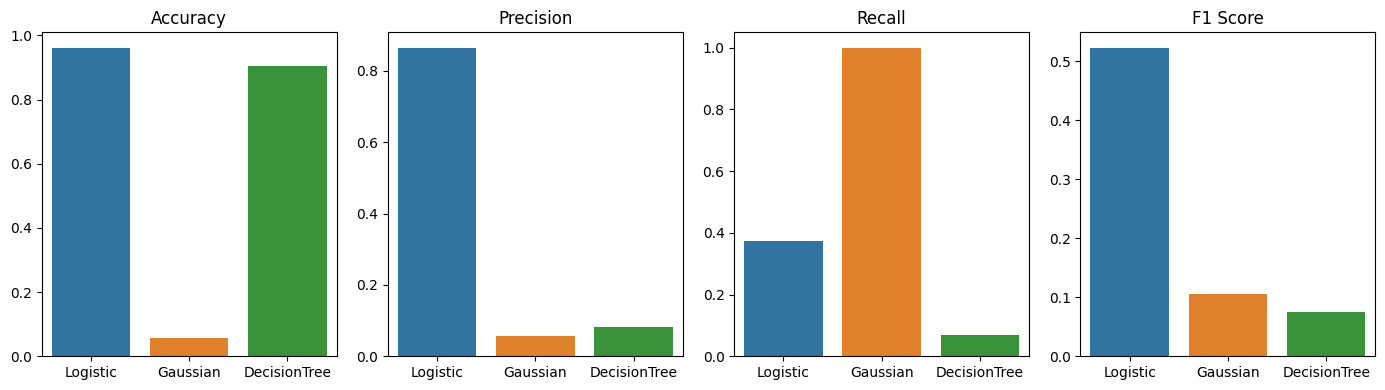

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train models
for model_name, model in models.items():
    model.fit(x_train1, y_train)

Accuracy_list = []
Precision_list = []
Recall_list = []
F1_list = []

# Test models
for model_name, model in models.items():
    print(f'Evaluation metrics for {model_name}:')
    y_pred = model.predict(x_test)
    A = accuracy_score(y_test, y_pred)
    B = precision_score(y_test, y_pred)
    C = recall_score(y_test, y_pred)
    D = f1_score(y_test, y_pred)
    Accuracy_list.append(A)
    Precision_list.append(B)
    Recall_list.append(C)
    F1_list.append(D)
    print('Accuracy:',A )
    print('Precision:', B)
    print('Recall:', C)
    print('F1 Score:',D ,"\n")

Model1 = ['Logistic','Gaussian','DecisionTree']


fig, axs = plt.subplots(1, 4, figsize=(14, 4))

sns.barplot(x=Model1, y=Accuracy_list, ax=axs[0])
axs[0].set_title('Accuracy')

sns.barplot(x=Model1, y=Precision_list, ax=axs[1])
axs[1].set_title('Precision')

sns.barplot(x=Model1, y=Recall_list, ax=axs[2])
axs[2].set_title('Recall')

sns.barplot(x=Model1, y=F1_list, ax=axs[3])
axs[3].set_title('F1 Score')

plt.tight_layout()
plt.show()

###Applying KNN to test our clustering on labelled dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sampled_df['embedding'].tolist(), sampled_df['manual_label'], test_size=0.3, random_state=42)

# Convert list of arrays to 2D numpy array
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.9801424676809427
Precision: 0.9198966408268734
Recall: 0.7138670368656487
F1 Score: 0.8038909154073302


###Plotting bar plots for KNN

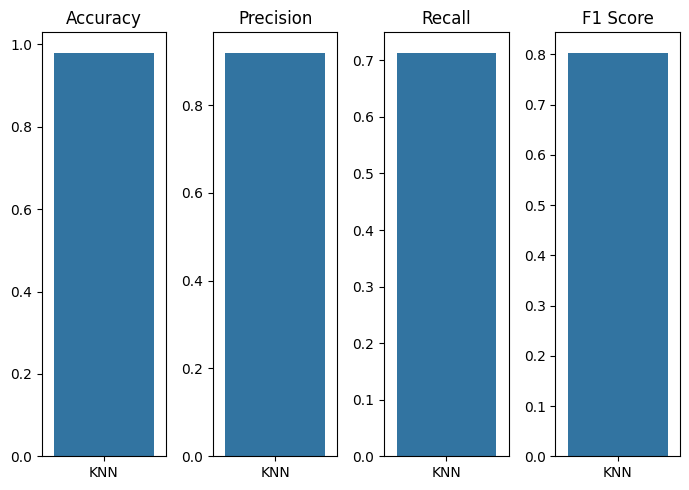

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(7, 5))

sns.barplot(x=['KNN'], y=[accuracy_score(y_test, y_pred)], ax=axs[0])
axs[0].set_title('Accuracy')
sns.barplot(x=['KNN'], y=[precision_score(y_test, y_pred)], ax=axs[1])
axs[1].set_title('Precision')
sns.barplot(x=['KNN'], y=[recall_score(y_test, y_pred)], ax=axs[2])
axs[2].set_title('Recall')
sns.barplot(x=['KNN'], y=[f1_score(y_test, y_pred)], ax=axs[3])
axs[3].set_title('F1 Score')
plt.tight_layout()
plt.show()

###Making dataset for applying DBSCAN

In [ ]:
train_data1, test_data1 = train_test_split(sampled_df, test_size=0.2, random_state=42)
X_train1 = np.array(train_data1['embedding'].tolist())

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X_train1)

labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(X_train1, labels)
    print("For n_clusters =", n_clusters_,
          "The average silhouette_score is :", silhouette_avg)
else:
    print('Only 1 cluster formed, cannot calculate silhouette score.')


train_data1['cluster'] = labels
spam_cluster = train_data1[train_data1['spam'] == 1]['cluster'].mode()[0]
print('Cluster with spam comments:', spam_cluster)

In [ ]:
dbscan1 = DBSCAN(eps=0.9, min_samples=5)
dbscan1.fit(X_train1)

labels1 = dbscan1.labels_

n_clusters1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
print("Number of cluster = ",n_clusters1)
if n_clusters1 > 1:
    silhouette_avg1 = silhouette_score(X_train1, labels1)
    print("For n_clusters =", n_clusters1,
          "The average silhouette_score is :", silhouette_avg1)
else:
    print('Only 1 cluster formed, cannot calculate silhouette score.')


train_data1['cluster'] = labels1
spam_cluster1 = train_data1[train_data1['spam'] == 1]['cluster'].mode()[0]
print('Cluster with spam comments:', spam_cluster1)
